[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


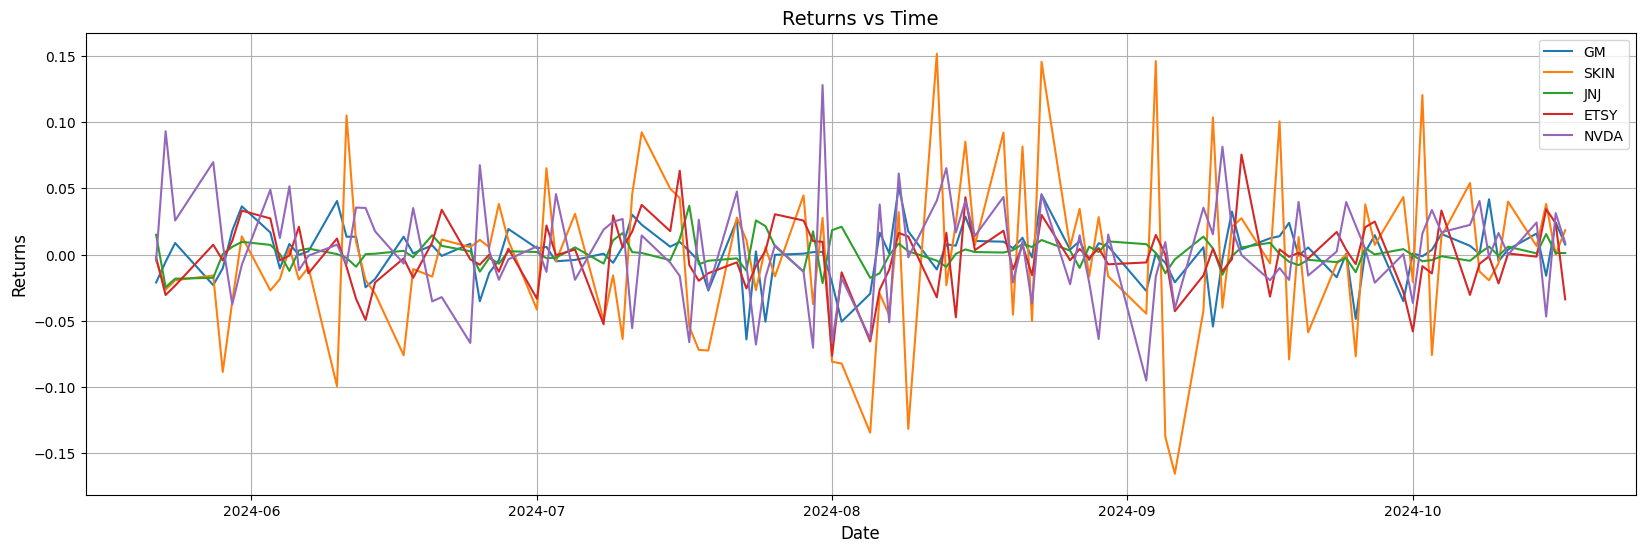

            GM      SKIN       JNJ      ETSY      NVDA
GM    0.000418  0.000236  0.000015  0.000172  0.000098
SKIN  0.000236  0.003533  0.000015  0.000512  0.000431
JNJ   0.000015  0.000015  0.000100  0.000052 -0.000192
ETSY  0.000172  0.000512  0.000052  0.000626  0.000059
NVDA  0.000098  0.000431 -0.000192  0.000059  0.001449
            GM      SKIN       JNJ      ETSY      NVDA
GM    1.000000  0.193992  0.071610  0.336898  0.125464
SKIN  0.193992  1.000000  0.024936  0.344279  0.190474
JNJ   0.071610  0.024936  1.000000  0.207233 -0.503565
ETSY  0.336898  0.344279  0.207233  1.000000  0.061442
NVDA  0.125464  0.190474 -0.503565  0.061442  1.000000


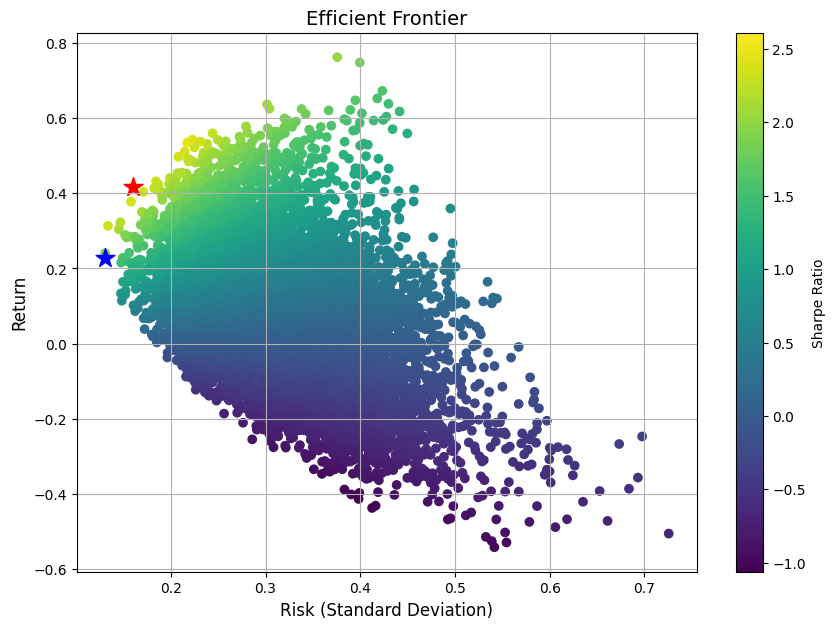

Portfolio with maximum Sharpe ratio:
Return: 0.41705192883505715
Risk: 0.15979940943531284
Sharpe Ratio: 2.6098464963594292
Portfolio with minimum risk:
Return: 0.22867267309501357
Risk: 0.13058147379573531
Sharpe Ratio: 1.7511877178895943


In [1]:
# libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr

# Stock list 
stock_list = ['GM', 'SKIN', 'JNJ', 'ETSY', 'NVDA']
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=150)

# Stock Data and Returns
returns_data = {}
for stock in stock_list:
    data = yf.download(stock, start=start_date, end=end_date)
    data = data['Close']
    returns = data.pct_change()
    returns_data[stock] = returns

returns_df = pd.DataFrame(returns_data)
returns_df = returns_df.dropna()

# Returns vs Timme
plt.figure(figsize=(20, 6))
for stock in stock_list:
    plt.plot(returns_df.index, returns_df[stock], label=stock)

plt.title('Returns vs Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Covariance and correlation matrices
cov_matrix = returns_df.cov()
corr_matrix = returns_df.corr()
print(cov_matrix)
print(corr_matrix)

# Monte Carlo simulation for portfolio generation
num_portfolios = 10000
results = np.zeros((4, num_portfolios))
np.random.seed(42)

rf = 0.0

# Simulate portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(stock_list))
    weights /= np.sum(weights)

    # Portfolio Return and Risk
    portfolio_return = np.sum(weights * returns_df.mean()) * 252  # Annualized return
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)  # Annualized risk

    # Sharpe ratio
    sharpe_ratio = (portfolio_return - rf) / portfolio_std_dev

    # Store the results in the results array
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = sharpe_ratio
    results[3, i] = i

# Convert results array into DataFrame
results_frame = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe Ratio', 'Index'])

# Plotting the efficient frontier
plt.figure(figsize=(10, 7))
plt.scatter(results_frame['Risk'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier', fontsize=14)
plt.xlabel('Risk (Standard Deviation)', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.grid(True)

# Highlight the maximum Sharpe ratio portfolio
max_sharpe_idx = results_frame['Sharpe Ratio'].idxmax()
plt.scatter(results_frame.loc[max_sharpe_idx, 'Risk'], results_frame.loc[max_sharpe_idx, 'Return'], color='red', marker='*', s=200)

# Highlight the minimum risk portfolio
min_risk_idx = results_frame['Risk'].idxmin()
plt.scatter(results_frame.loc[min_risk_idx, 'Risk'], results_frame.loc[min_risk_idx, 'Return'], color='blue', marker='*', s=200)

plt.show()

# Display the portfolio with maximum Sharpe ratio
print("Portfolio with maximum Sharpe ratio:")
print("Return:", results_frame.loc[max_sharpe_idx, 'Return'])
print("Risk:", results_frame.loc[max_sharpe_idx, 'Risk'])
print("Sharpe Ratio:", results_frame.loc[max_sharpe_idx, 'Sharpe Ratio'])

# Display the portfolio with minimum risk
print("Portfolio with minimum risk:")
print("Return:", results_frame.loc[min_risk_idx, 'Return'])
print("Risk:", results_frame.loc[min_risk_idx, 'Risk'])
print("Sharpe Ratio:", results_frame.loc[min_risk_idx, 'Sharpe Ratio'])

